In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('IMDB Dataset.csv')

df


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [45]:
df.describe()

,review,sentiment
count,50000,50000
unique,49578,2
top,loved todays show variety solely cooking would...,positive
freq,5,25000


In [2]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stopwords in English
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters (keep only alphanumeric characters and spaces)
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    # Tokenize the text and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the 'review' column in the DataFrame
df['review'] = df['review'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ilias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,im going disagree previous comment side maltin...,negative


In [3]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data and transform it into TF-IDF features
X = vectorizer.fit_transform(df['review'])

# Convert the 'sentiment' column to binary values: 1 for positive, 0 for negative
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the size of the dataset to 40% of the original size for both training and testing sets
fraction = 0.4
num_train_samples = int(X_train_full.shape[0] * fraction)
num_test_samples = int(X_test_full.shape[0] * fraction)

# Select a subset of the training and testing data based on the reduced size
X_train = X_train_full[:num_train_samples]
y_train = y_train_full[:num_train_samples]
X_test = X_test_full[:num_test_samples]
y_test = y_test_full[:num_test_samples]

In [42]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
start = time.time()

# Initialize the Support Vector Classifier model
model = SVC()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the sentiment labels for the test data
y_pred = model.predict(X_test)
end = time.time()
time_without_extension = end - start
accuracy_without_extension = accuracy_score(y_test, y_pred)
print(f'Accuracy without Intel Extension: {accuracy_without_extension}')
print(f'Time without Intel Extension: {time_without_extension} seconds')


Accuracy without Intel Extension: 0.89225
Time without Intel Extension: 433.313499212265 seconds


In [39]:
from sklearnex import patch_sklearn

patch_sklearn() # Patch Scikit-Learn to use Intel Extension for optimized performance

start = time.time()

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
end = time.time()
time_with_extension = end - start
accuracy_with_extension = accuracy_score(y_test, y_pred)
print(f'Accuracy with Intel Extension: {accuracy_with_extension}')
print(f'Time with Intel Extension: {time_with_extension} seconds')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy with Intel Extension: 0.89225
Time with Intel Extension: 5.471498250961304 seconds


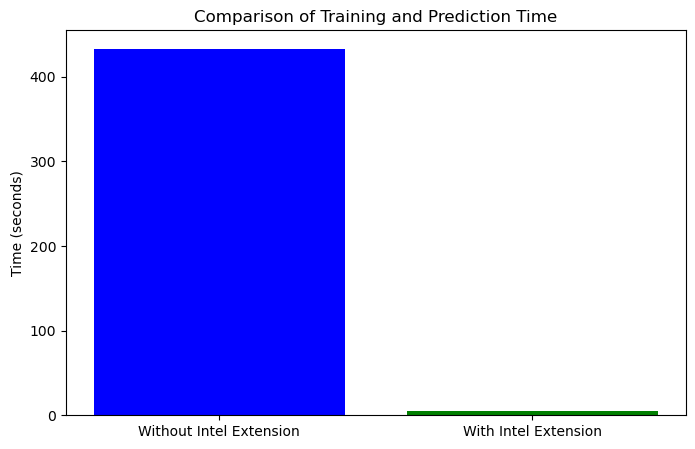

In [43]:
import matplotlib.pyplot as plt

labels = ['Without Intel Extension', 'With Intel Extension']
times = [time_without_extension, time_with_extension]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.title('Comparison of Training and Prediction Time')
plt.show()